**IMPORTING LIBRARIES**

In [28]:
# for performing linear algebra
import numpy as np
# for importing dataset (data preprocessing)
import pandas as pd
# for data visulaization
import matplotlib.pyplot as plt 


**IMPORTING THE DATASET**

In [29]:
dataset = pd.read_csv("/content/breast_cancer.csv")

X = dataset.iloc[:,1:-1].values  # x values are trimmed
y = dataset.iloc[:,-1].values   # y values are also trimmed

dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 58.8 KB


In [31]:
print("Cancer data set dimensions : {}".format(dataset.shape))
dataset.groupby('Class').size()

Cancer data set dimensions : (683, 11)


Class
2    444
4    239
dtype: int64

**VISUALIZATION**

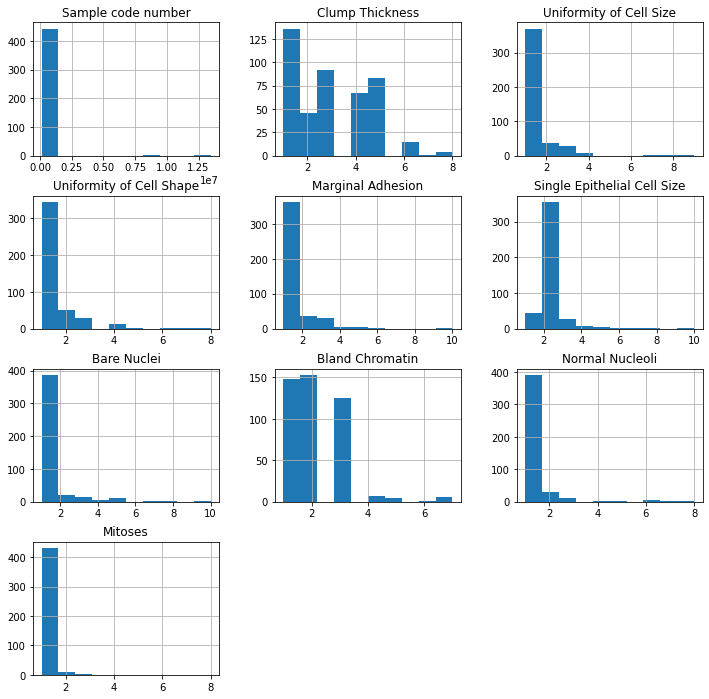

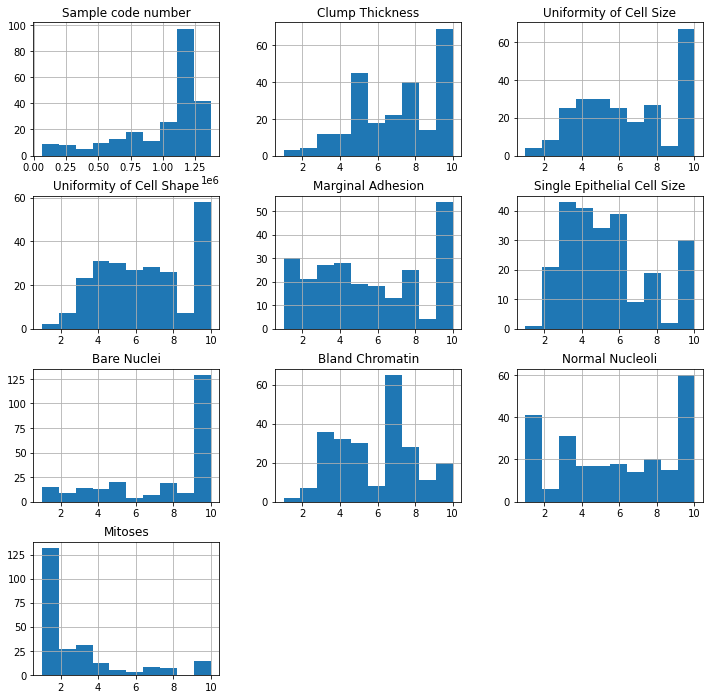

In [32]:
dataset.groupby('Class').hist(figsize=(12,12))

dataset.isnull().sum()
dataset.isna().sum()

dataframe = pd.DataFrame(y)

**SPLITTING THE DATASET INTO THE TRAINING SET AND TEST SET**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)




 

**TRAINING THE LOGISTIC REGRESSION, K NEIGHBORS CLASSIFIER, SVM,DESICION TREE CLASSIFIER AND RANDOM FOREST CLASSIFIER MODEL ON THE TRAINING SET**

In [38]:
# USING LOGISTIC REGRESSION MODEL
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)   # creating a LR model
classifier.fit(X_train,y_train) # training of LR model by calling fit model from our classifier object

# USING K NEIBHBORS CLASSIFIER  
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric ='minkowski', p =2)
classifier.fit(X_train,y_train)

 #USING SUPPORT VECTOR MACHINE
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#USING DECISION TREE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# USING RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

**PREDICTING THE TEST SET RESULTS**

In [39]:
y_pred = classifier.predict(X_test)


**MAKING THE CONFUSION MATRIX**

In [40]:
# HOW MANY CORRECT PREDICTION ARE THERE AND HOW MANY INCORRECT PREDICTION IS THERE WE WILL MAKE IT
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[78  1]
 [ 5 53]]


**COMPUTINNG THE ACCURACY WITH K-FOLD CROSS VALIDATION**

In [41]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator= classifier,X = X_train , y= y_train, cv = 10)
print("Accuracy: {:.2f}%".format(accuracy.mean()*100))  #want only 2 decimal
print("Standard deviation: {:.2f}%".format(accuracy.std()*100))

Accuracy: 95.04%
Standard deviation: 1.68%


**SUMMARY:- AS WE CAN SEE HERE THAT OUR LOGISTIC REGRESSION MODEL IS 96.70% ACCURATE AND S.D IS VERY LESS SO WE CAN INFER THAT OUR MODEL IS PERFORMING WELL FOR BREAST CANCER PREDICTION AND THEREFORE IT CAN BE TOTALLY VALIDATED BY DOCTOR OR MEDICAL INSITITUTIONS  ** 